In [109]:
with open('out_2.txt') as f:
    lines = f.readlines()

data = lines[2:-1]

In [110]:
test = []

for point in data:
    test.append(list(map(lambda s: s.strip()[:3] if s.strip()[:3] == "100" else s.strip()[:2], point[35:].split("->")))[:-2])
    # test.append(list(map(lambda s: s.strip()[:3], point[35:].split("->")))[:-2])

test2 = []
for point in test:
    if len(point) > 0:
        # test2.append(list(map(lambda s: int(s), point)))
        test2.append(list(map(lambda s: s.strip(), point)))

# for i in range(0, len(data)):
    # for j in range(0, len(data[i])):
        # test[i][j] = test[i][j].strip()

test2

[['28',
  '27',
  '69',
  '50',
  '76',
  '12',
  '3',
  '79',
  '78',
  '34',
  '9',
  '35',
  '66',
  '20',
  '32'],
 ['71', '65', '81', '33', '51', '30', '70'],
 ['53', '26', '40', '58'],
 ['7',
  '82',
  '45',
  '61',
  '42',
  '15',
  '57',
  '87',
  '2',
  '21',
  '73',
  '74',
  '72',
  '4',
  '55',
  '25',
  '54'],
 ['19',
  '48',
  '47',
  '36',
  '49',
  '46',
  '8',
  '18',
  '52',
  '89',
  '6',
  '94',
  '13',
  '97',
  '95'],
 ['96', '99', '5', '84', '17', '83', '60'],
 ['23', '67', '39', '56', '75', '22', '41'],
 ['1', '31', '88', '62', '11', '64', '63', '10', '90'],
 ['29', '24', '80', '68', '77'],
 ['59',
  '92',
  '98',
  '91',
  '44',
  '14',
  '38',
  '86',
  '16',
  '85',
  '93',
  '37',
  '100',
  '43']]

In [111]:
import json

with open("test/test_2.json") as f:
    a = json.load(f)
depot = a['depot']
patients = a['patients']
patients[test2[3][0]]

{'x_coord': 20,
 'y_coord': 50,
 'demand': 5,
 'start_time': 72,
 'end_time': 679,
 'care_time': 10}

{'1': (41, 49), '2': (35, 17), '3': (55, 45), '4': (55, 20), '5': (15, 30), '6': (25, 30), '7': (20, 50), '8': (10, 43), '9': (55, 60), '10': (30, 60), '11': (20, 65), '12': (50, 35), '13': (30, 25), '14': (15, 10), '15': (30, 5), '16': (10, 20), '17': (5, 30), '18': (20, 40), '19': (15, 60), '20': (45, 65), '21': (45, 20), '22': (45, 10), '23': (55, 5), '24': (65, 35), '25': (65, 20), '26': (45, 30), '27': (35, 40), '28': (41, 37), '29': (64, 42), '30': (40, 60), '31': (31, 52), '32': (35, 69), '33': (53, 52), '34': (65, 55), '35': (63, 65), '36': (2, 60), '37': (20, 20), '38': (5, 5), '39': (60, 12), '40': (40, 25), '41': (42, 7), '42': (24, 12), '43': (23, 3), '44': (11, 14), '45': (6, 38), '46': (2, 48), '47': (8, 56), '48': (13, 52), '49': (6, 68), '50': (47, 47), '51': (49, 58), '52': (27, 43), '53': (37, 31), '54': (57, 29), '55': (63, 23), '56': (53, 12), '57': (32, 12), '58': (36, 26), '59': (21, 24), '60': (17, 34), '61': (12, 24), '62': (24, 58), '63': (27, 69), '64': (15, 7

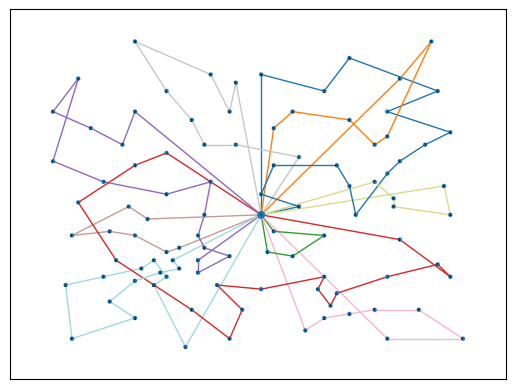

In [112]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

G = nx.Graph()
pos ={}
for pk in patients.keys():
    pos[pk] = (patients[pk]['x_coord'], patients[pk]['y_coord'])

G.add_node("0", label="depot", weight=15)
pos["0"] = (depot['x_coord'], depot['y_coord'])
for i in range(0, len(patients)):
    G.add_node(str(i+1), weight=3)

print(pos)

colors = plt.cm.tab20(np.linspace(0, 1, len(test2)))

for j, route in enumerate(test2):
    for i in range(0, len(route)):
        #if i == 0 line from depot to patient
        #if i == end line from patient to depot
        if i == 0:
            G.add_edge(str(0), str(route[i]), color=colors[j])
            G.add_edge(str(route[i]), str(route[i+1]), color=colors[j])
        elif i == len(route) - 1:
            G.add_edge(str(route[i]), str(0), color=colors[j])
        else:
            G.add_edge(str(route[i]), str(route[i+1]), color=colors[j])

options = {
    "font_size": 2,
    "linewidths": 1,
    "width": 1,
}

sizes = nx.get_node_attributes(G, 'weight').values()
sizes = list(map(lambda s: s*1.5, sizes))

nx.draw_networkx(G, pos, **options, edge_color=nx.get_edge_attributes(G, 'color').values(), node_size=sizes)
plt.savefig("test_2.svg")
plt.show()